# About dataset

# Predicting heart disease using machine learning

# 1. Problem Statement

#Given clinical parameters about a patient, can we predict whether or not they have heart disease

# features 

- This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the database) Create data dictionary

- age: Displays the age of the individual.

- sex: Displays the gender of the individual using the following format : 1 = male 0 = female

- cp- Chest-pain type: displays the type of chest-pain experienced by the individual using the following format : 0 = typical angina 1 = atypical angina 2 = non — anginal pain 3 = asymptotic

- trestbps- Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit). anything above 130-140 is typically cause for concern.

- chol- Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)

- fbs- Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false) '>126' mg/dL signals diabetes

- restecg- Resting ECG : displays resting electrocardiographic results 0 = normal 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy

- thalach- Max heart rate achieved : displays the max heart rate achieved by an individual.

- exang- Exercise induced angina : 1 = yes 0 = no

- oldpeak- ST depression induced by exercise relative to rest: displays the value which is an integer or float.

- slope- Slope of the peak exercise ST segment : 0 = upsloping: better heart rate with excercise (uncommon) 1 = flat: minimal change (typical healthy heart) 2 = downsloping: signs of unhealthy heart

- ca- Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.

- thal : Displays the thalassemia : 1,3 = normal 6 = fixed defect 7 = reversible defect: no proper blood movement when excercising

- target : Displays whether the individual is suffering from heart disease or not : 1 = yes 0 = no

In [1]:
# import the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# get the data

In [3]:
# read the date 
df=pd.read_csv("heart.csv")

In [4]:
# first five rows 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# information of the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#conclude-We can observe that the dataset has a combination of  numeric (float and int)-14 features

In [7]:
## Summary statistics of Numerical features.
df.describe() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Find missing value

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
#conclude - We can see for each numeric feature, the count , the mean value, standard deviation,
#           minimum value, maximum value and the 25% percentile, the 50% percentile or median, the 75% percentile.

In [10]:
# We can plot a seaborn countplot displaying the frequency of both categories of the target variable.

In [11]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

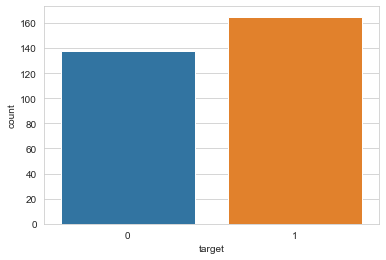

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df)

In [13]:
#we can see that suffering from heart disease = 0(no)= 138 1(yes)=165

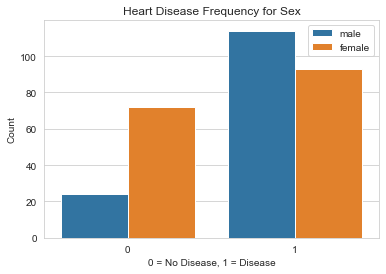

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='sex',hue='target',data=df)
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Count")
plt.legend(['male','female'])
plt.show()

In [15]:
# We can see that the male is suffering from disese from more than female 

# Heart Disease Frequency per Chest Pain Type
cp - chest pain type

0: Typical angina: chest pain related decrease blood supply to the heart

1: Atypical angina: chest pain not related to heart

2: Non-anginal pain: typically esophageal spasms (non heart related)

3: Asymptomatic: chest pain not showing signs of disease

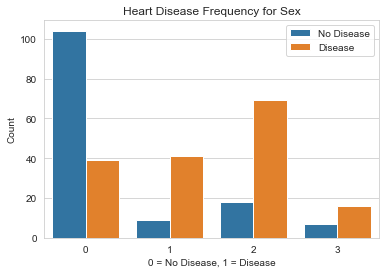

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='cp',hue='target',data=df)
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Count")
plt.legend(["No Disease", "Disease"])
plt.show()

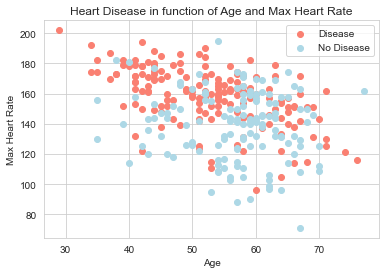

In [17]:
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c = "salmon")
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c = "lightblue")
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);
     


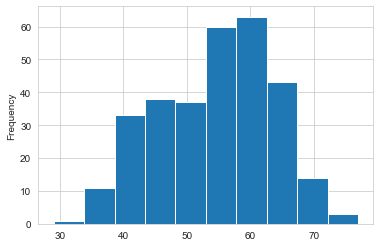

In [18]:
# Check the distribution of the age column with a histogram

df.age.plot.hist();

# find the missing values 

In [26]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [27]:
# mo missing values found 

In [28]:
# no categarical variable found 

In [29]:
# now data is ready for the lean algoriithm

# model bulding

In [30]:
#select the dependent(y) and independent(x) variable 

In [31]:
X=df.drop('target',axis=1)
y=df[['target']]

In [32]:
# check the shapwe3

In [33]:
X.shape

(303, 13)

In [34]:
y.shape

(303, 1)

In [35]:
# The data is sesitive to datapoint to go for the Standardisation
# standadization of data

In [36]:
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()

scaled=scalar.fit_transform(X)

In [37]:
# split the data in train and test

In [38]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [39]:
X_train,X_test,y_train,y_test=train_test_split(scaled,y,test_size=0.2,random_state=42)

In [40]:
# LogisticRegreesion Analysis

In [41]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the defalut parameter)
lr=LogisticRegression()

# fit the model with data
lr.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [42]:
# prediction on your test data
lr_test_pred=lr.predict(X_test)
# prediction on your tRAIN data
lr_train_pred=lr.predict(X_train)

In [43]:
# train data accuracy
print("Train=Accuracy:",metrics.accuracy_score(y_train,lr_train_pred))

# test data accuracy
print("Test=Accuracy:",metrics.accuracy_score(y_test,lr_test_pred))

Train=Accuracy: 0.8636363636363636
Test=Accuracy: 0.8524590163934426


In [44]:
# confusion matrix

In [45]:
from sklearn.metrics import confusion_matrix 
cnf_metrics=confusion_matrix(y_test,lr_test_pred)
cnf_metrics

array([[25,  4],
       [ 5, 27]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

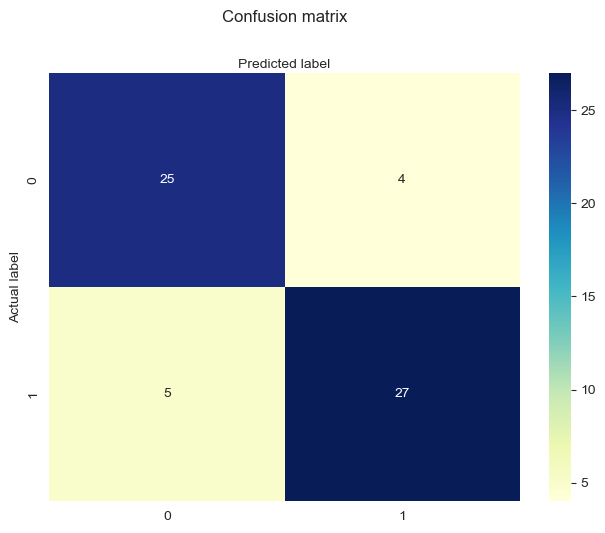

In [46]:
import seaborn as sns
import  matplotlib.pyplot as plt
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_metrics), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [47]:
p_r_f=metrics.classification_report(y_test,lr_test_pred)
print(p_r_f)

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



# decision tree 

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# instantiate the model (using the defalut parameter)
dt=DecisionTreeClassifier()

# fit the model with data
dt.fit(X_train,y_train)


DecisionTreeClassifier()

In [50]:
# prediction on your test data
dt_test_pred=dt.predict(X_test)
# prediction on your tRAIN data
dt_train_pred=dt.predict(X_train)

In [51]:
# train data accuracy
print("Train=Accuracy:",metrics.accuracy_score(y_train,dt_train_pred))

# test data accuracy
print("Test=Accuracy:",metrics.accuracy_score(y_test,dt_test_pred))

Train=Accuracy: 1.0
Test=Accuracy: 0.819672131147541


In [52]:
# using hyperparameter tuning 

In [53]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [54]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [55]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [56]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}

In [57]:
# prediction on your test data
hdt_test_pred=grid_search.predict(X_test)
# prediction on your train data
hdt_train_pred=grid_search.predict(X_train)

In [58]:
print("Train_Accurancy:",metrics.accuracy_score(y_train,hdt_train_pred))
print("Test_Accurancy:",metrics.accuracy_score(y_test,hdt_test_pred))

Train_Accurancy: 0.8801652892561983
Test_Accurancy: 0.8524590163934426


In [59]:
from sklearn.metrics import confusion_matrix 
cnf_metrics=confusion_matrix(y_test,hdt_test_pred)
cnf_metrics

array([[28,  1],
       [ 8, 24]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

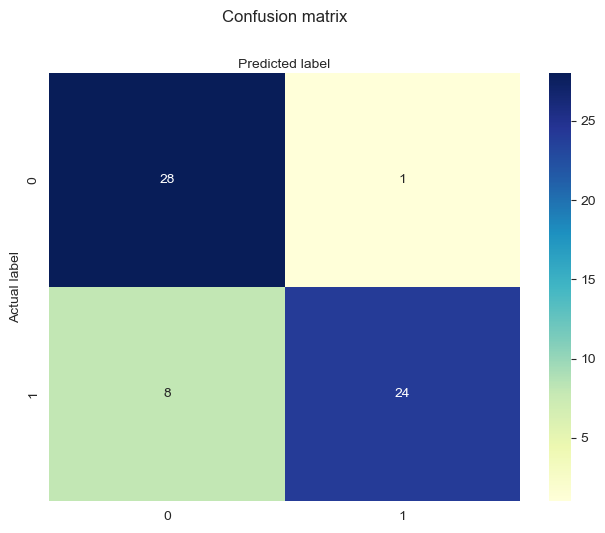

In [60]:
import seaborn as sns
import  matplotlib.pyplot as plt
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_metrics), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [61]:
p_r_f=metrics.classification_report(y_test,hdt_test_pred)
print(p_r_f)

              precision    recall  f1-score   support

           0       0.78      0.97      0.86        29
           1       0.96      0.75      0.84        32

    accuracy                           0.85        61
   macro avg       0.87      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61



# random Forest 

In [63]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf.fit(X_train,y_train)

C:\Users\balas\AppData\Local\Temp\ipykernel_55164\514385452.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestClassifier()

In [64]:
# prediction on your test data
rf_test_pred=rf.predict(X_test)
# prediction on your tRAIN data
rf_train_pred=rf.predict(X_train)

In [65]:
print("Train_Accurancy:",metrics.accuracy_score(y_train,rf_train_pred))
print("Test_Accurancy:",metrics.accuracy_score(y_test,rf_test_pred))

Train_Accurancy: 1.0
Test_Accurancy: 0.8688524590163934


In [66]:
# using hyper parameter 

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rfc=RandomForestClassifier()

In [68]:
param={'n_estimators': [10,25, 50, 75, 100, 150, 200],
          'criterion':['gini', 'entropy'],
       'min_samples_leaf':np.arange(10,40,10),
        'min_samples_split':np.arange(2,15,5)}

In [69]:
grid_r=RandomizedSearchCV(rfc,param)

In [70]:
grid_r.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'min_samples_leaf': array([10, 20, 30]),
                                        'min_samples_split': array([ 2,  7, 12]),
                                        'n_estimators': [10, 25, 50, 75, 100,
                                                         150, 200]})

In [71]:
grid_r.best_params_

{'n_estimators': 75,
 'min_samples_split': 2,
 'min_samples_leaf': 20,
 'criterion': 'gini'}

In [72]:
hrf_test_pred=grid_r.predict(X_test)
hrf_train_pred=grid_r.predict(X_train)

In [73]:
print("Train_Accurancy:",metrics.accuracy_score(y_train,hrf_train_pred))
print("Test_Accurancy:",metrics.accuracy_score(y_test,hrf_test_pred))

Train_Accurancy: 0.8553719008264463
Test_Accurancy: 0.8852459016393442


In [74]:
from sklearn.metrics import confusion_matrix 
cnf_metrics=confusion_matrix(y_test,hrf_test_pred)
cnf_metrics

array([[25,  4],
       [ 3, 29]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

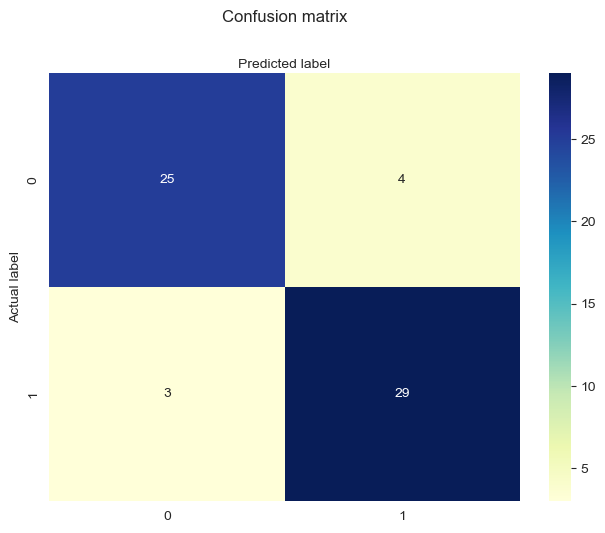

In [75]:
import seaborn as sns
import  matplotlib.pyplot as plt
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_metrics), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [76]:
p_r_f=metrics.classification_report(y_test,hrf_test_pred)
print(p_r_f)

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### result= After analysing the all three model and cross validation decision tree classifer cross validation give the best result 